[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/Estadistica%20de%20Datos/notebook/practice/Practica_Estadistica_Multivariada.ipynb)

# Practica de Estadística - Multivariada
---


### Ciclo de vida de la ciencia de datos:

Como hemos visto a lo largo de este diplomado, todo iniciado en ciencias de datos seguimos ciertos pasos base para un mejor entendimiento de lo que se hace.

Entre estos pasos tenemos los siguientes:

   * 1.- Definición de la hipótesis
   * 2.- Adquisición de datos
   * 3.- Análisis exploratorio de datos
   * 4.- Construcción de modelo
   * 5.- Reporte de resultados
   * 6.- Producto final
   
![alt text](https://miro.medium.com/max/1400/0*7M9FK6orsn4RdUFb.png)
  
  
---

En las primeras etapas, nos enfocamos en el análisis exploratorio de datos **Univariados** (proporciona un panorama del conjunto de datos crudos para una variable), **Bivariados** (para encontrar relaciones entre cada variable en el conjunto de datos y la variable 'objetivo' de interes o simplemente encontrar la relación entre 2 variables) y **Multivariados** (principalmente para entender interacciones entre diferentes 'campos' del conjunto de datos o encontrar relaciones entre más de 2 variables).



Empecemos por detalles para la práctica...

Implementar el Análisis Estadístico (Exploratorio) de Datos (**EDA**, por sus siglas en inglés) usando python es muy fácil porque python tiene una miríada de paquetes de análisis estadístico (por ejemplo, numpy, pandas, matplotlib, etc.). 

Realizaremos en esta práctica los análisis exploratorios para cada uno de los tipos de análisis paso a paso usando python y sacaremos algunas conclusiones.

In [1]:
#importamos las librerias de siempre...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import data_table
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importamos el conjunto de datos:

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/jhermosillo/diplomado_CDD2019/master/Estadistica%20de%20Datos/data/Employee.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  553k  100  553k    0     0  1148k      0 --:--:-- --:--:-- --:--:-- 1148k


In [3]:
df = pd.read_csv('Employee.csv')
df.head()

satisfaction_level  last_evaluation  ...  Departments   salary
0                0.38             0.53  ...         sales     low
1                0.80             0.86  ...         sales  medium
2                0.11             0.88  ...         sales  medium
3                0.72             0.87  ...         sales     low
4                0.37             0.52  ...         sales     low

[5 rows x 10 columns]

## Análisis Univariado

### Podemos realizar un análisis general de los datos

Una vez que cargamos los datos, estamos listos para el primer tipo de EDA llamado análisis univariado. Básicamente nos dice cómo se distribuyen los datos en cada característica y también nos informa sobre tendencias centrales como la media, la mediana y la moda.

Por lo que parte de este ejercicio será realizar un análisis descriptivo de los datos

### Estadística Descriptiva

Primero lo primero, verifique las medidas de las tendencias centrales de media, mediana y modo, verifique los valores mínimos y máximos y los cuantiles de cada característica.

In [4]:
print('Mediana por columna')
df.median()

Mediana por columna


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [5]:
print('Moda por columna')
df.mode()

Moda por columna


satisfaction_level  last_evaluation  ...  Departments   salary
0                 0.1             0.55  ...         sales     low
1                 NaN              NaN  ...           NaN     NaN

[2 rows x 10 columns]

In [6]:
df.describe() 

satisfaction_level  last_evaluation  ...          left  promotion_last_5years
count        14999.000000     14999.000000  ...  14999.000000           14999.000000
mean             0.612834         0.716102  ...      0.238083               0.021268
std              0.248631         0.171169  ...      0.425924               0.144281
min              0.090000         0.360000  ...      0.000000               0.000000
25%              0.440000         0.560000  ...      0.000000               0.000000
50%              0.640000         0.720000  ...      0.000000               0.000000
75%              0.820000         0.870000  ...      0.000000               0.000000
max              1.000000         1.000000  ...      1.000000               1.000000

[8 rows x 8 columns]

De la tabla anterior, podemos ver que el nivel de satisfacción promedio entre los empleados es de solo 61.12%, donde se desvía en un 24%, lo que significa que hay mucha variación entre la satisfacción de los empleados que afecta directamente la productividad. 


En esta sección utilizaremos la mediana, dado que no se ve afectada por la presencia de valores atípicos, mientras que la media si se ve afectada fácilmente.

### Variables categóricas

Hemos visto que en la presencia de este tipo de variables, se utilizan las tablas de frencuencias para realizar análisis. ¿Cómo obtendríamos dicho análisis para la variable de salario?

In [0]:
df.columns = df.columns.str.strip()

In [8]:
salary = pd.crosstab(index = df["salary"], columns = "count")
salary

col_0   count
salary       
high     1237
low      7316
medium   6446

¿Y para la variable de departamentos?

In [9]:
Departments = pd.crosstab(index = df["Departments"], columns = "count")
data_table.DataTable(Departments, include_index = True, num_rows_per_page = 10)	

De lo anterior, podemos decir que casi el 48% de los empleados tienen un salario bajo y solo el 8% de los empleados tiene un salario alto.

### Visualización

   * Histograma
En el análisis univariado, usamos histogramas para analizar y visualizar la distribución de frecuencias. Trazar histogramas en pandas es muy fácil y directo. ¿Cómo podríamos hacer un histograma considerando las horas promedio de los trabajadores?

Text(0.05, 0.5, '$Frequency$')

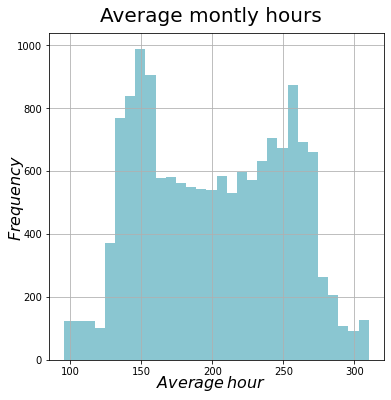

In [10]:
fig = plt.figure(figsize=(6,6))
df_av = pd.Series(df['average_montly_hours'])
hist = df_av.hist(bins=30, color = '#8ac6d1')
fig.text(0.5,0.92, r'Average montly hours',ha='center',va='center',fontsize='20')
fig.text(0.5,0.07, r'$Average\,hour$',ha='center',va='center',fontsize='16')
fig.text(0.05,0.5, r'$Frequency$',ha='center',va='center',fontsize='16', rotation = 90)

De la imagen de arriba vemos que los datos no se distribuyen normalmente, por lo que no podemos realizar muchas operaciones estadísticas con estos datos.


## Desafío Adicional (No calificado)

En la práctica de estadística, realizaste un pequeño análisis de datos discordantes (atípicos) a un conjunto de datos simulados, donde además aplicaste la prueba de shapiro - wilks para comprobar la normalidad de los datos. creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar dicha metodología para encontrar si es posible aplicar algún tipo de estadística?

Siguiendo los siguientes pasos:

 * Aplicar Shapiro Wilks con un alpha = 0.05
 * Aplicar el módulo de detección de outliers de Dixon Q test a este conjunto de datos de 'horas promedio' y verificar si existe o existen outliers.
 * En caso positivo, remover los datos detectados como outliers y volver a aplicar Shapiro con el nuevo tamaño de muestra
 * Nota: al aplicar pruebas de discordancia, el valor que ha pasado la hipótesis alterna (H1) es detectado como valor discordante y por ende, se debe retirar de la muestra y volver a aplicar la prueba de discordancia, pero ahora para el conjunto de datos con n-1 valores. Así, hasta obtener H0 (est <= cv)
 
 Las siguientes líneas se dejan libres para código.


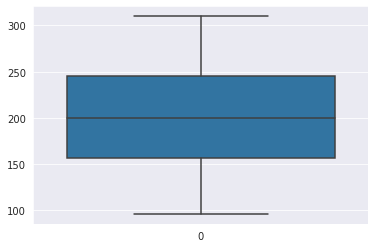

In [11]:
#Esta columna no presenta datos con outliers
sns.set_style("darkgrid")
sns.boxplot(data = df['average_montly_hours'])
plt.show()

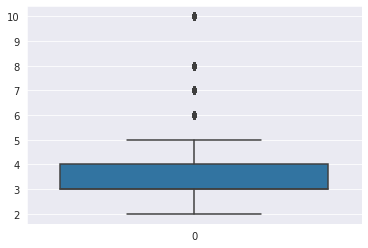

In [12]:
#Esta columna si presenta datos con outliers
sns.set_style("darkgrid")
sns.boxplot(data = df['time_spend_company'])
plt.show()

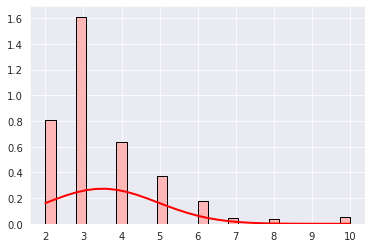

In [14]:
mu = df['time_spend_company'].mean()
sigma = df['time_spend_company'].std()
cuenta, cajas, ignorar = plt.hist(df['time_spend_company'], 
         bins = 30,
         histtype='bar', 
         color='#ffb6b6',
         edgecolor = 'black',
         density = True)

normal1 = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
          np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Length of the sample data: 14999, Test Statistic: 0.7930466532707214, p-value: 0.0, Comments: 
Sample does not look Gaussian (reject H0)



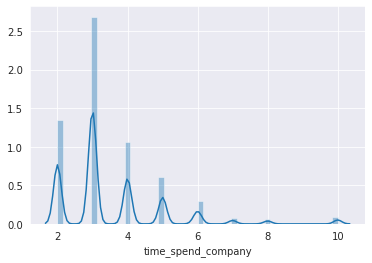

In [16]:
from scipy.stats import shapiro
def test_shapiro(data):
  stat, p = shapiro(data)
  alpha = 0.05
  if p > alpha:
      msg = '\nSample looks Gaussian (fail to reject H0)'
  else:
      msg = '\nSample does not look Gaussian (reject H0)'

  print(f'Length of the sample data: {len(data)}, Test Statistic: {stat}, p-value: {p}, Comments: {msg}\n')

  return sns.distplot(data)

test_shapiro(df['time_spend_company'])
plt.show()

In [17]:
q_low = df["time_spend_company"].quantile(0.05)
q_hi  = df["time_spend_company"].quantile(0.95)

df_filtered = df[(df["time_spend_company"] < q_hi) & (df["time_spend_company"] > q_low)]
data_table.DataTable(df_filtered, include_index = True, num_rows_per_page = 10, max_columns = 10)

In [0]:
def q_test(dataset):
    return (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])

def desicion(q_stat, q_ref):
  if q_stat > q_ref:
          print(f"Since our Q-statistic is {q_stat} and {q_stat} > {q_ref}, \nwe have evidence that our "
                "minimum point IS an outlier to the data.")
  else:
    print(f"Since our Q-statistic is {q_stat} and {q_stat} < {q_ref}, \nwe have evidence that our "
                "minimum point is NOT an outlier to the data.")

Since our Q-statistic is 0.0 and 0.0 < 0.29, 
we have evidence that our minimum point is NOT an outlier to the data.


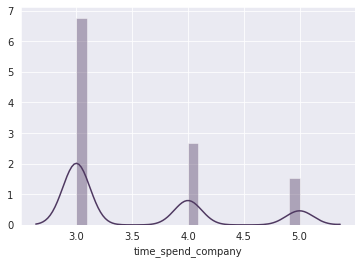

In [23]:
ax = sns.distplot(df_filtered['time_spend_company'], color = '#4f3961')
q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
q_stat = q_test(np.sort(df_filtered['time_spend_company']))
desicion(q_stat, q_ref)
plt.show()

## Análisis Bivariado / Multivariado

Los datos sin relaciones entre variables son el equivalente en ciencia de datos a un lienzo en blanco. 

Para pintar la imagen, necesitamos entender cómo las variables interactúan entre sí. ¿Un aumento en una variable se correlaciona con un aumento en otra? ¿Se relaciona con una disminución en otro lugar? La mejor manera de pintar la imagen es mediante el uso de gráficos que permiten estas posibilidades.

In [24]:
import pandas as pd
reviews = pd.read_csv("https://raw.githubusercontent.com/davestroud/Wine/master/winemag-data_first150k.csv", index_col=0)
reviews.head()

country  ...                   winery
0      US  ...                    Heitz
1   Spain  ...  Bodega Carmen Rodríguez
2      US  ...                 Macauley
3      US  ...                    Ponzi
4  France  ...     Domaine de la Bégude

[5 rows x 10 columns]

In [25]:
count_row = reviews.shape[0]  
count_col = reviews.shape[1]
print(f'Número de filas: {count_row}, número de columnas: {count_col}')

Número de filas: 150930, número de columnas: 10


A partir de aquí surgen diversas cuestiones extrañas...

"Para hacernos una imagen de los datos, lo primero que tenemos que hacer es agruparlos". 

Primero acotaremos el conjunto de datos, dado que por el momento analizar más de 150k de registros es bastante.
Generaremos una muestra aleatoria del 1% de los datos utilizando el método de 'sample' de pandas.

In [0]:
test = reviews.sample(frac=0.01, replace=True, random_state=1)
#data_table.DataTable(test, include_index = True, num_rows_per_page = 10, max_columns = 10)

En la siguiente sección ustedes realizaran un análisis categórico, parecido al ejercicio realizado con el conjunto de datos del titanic.

Consideraremos los 1509 renglones de las variables: país, variedad y precio.

Primero realizaremos la tabla de frecuencias de las variedades de los vinos. En las siguientes líneas ustedes deberán presentar lo que se pide.

In [27]:
variety = pd.crosstab(index = test["variety"], columns = "count")
data_table.DataTable(variety, include_index = True, num_rows_per_page = 10)

In [43]:
serie = test.loc[:,"variety"].value_counts(sort = True)
serie

Cabernet Sauvignon          161
Chardonnay                  152
Pinot Noir                  120
Red Blend                    93
Bordeaux-style Red Blend     65
                           ... 
Monastrell-Syrah              1
Antão Vaz                     1
Roditis                       1
Viognier-Roussanne            1
Lambrusco                     1
Name: variety, Length: 144, dtype: int64

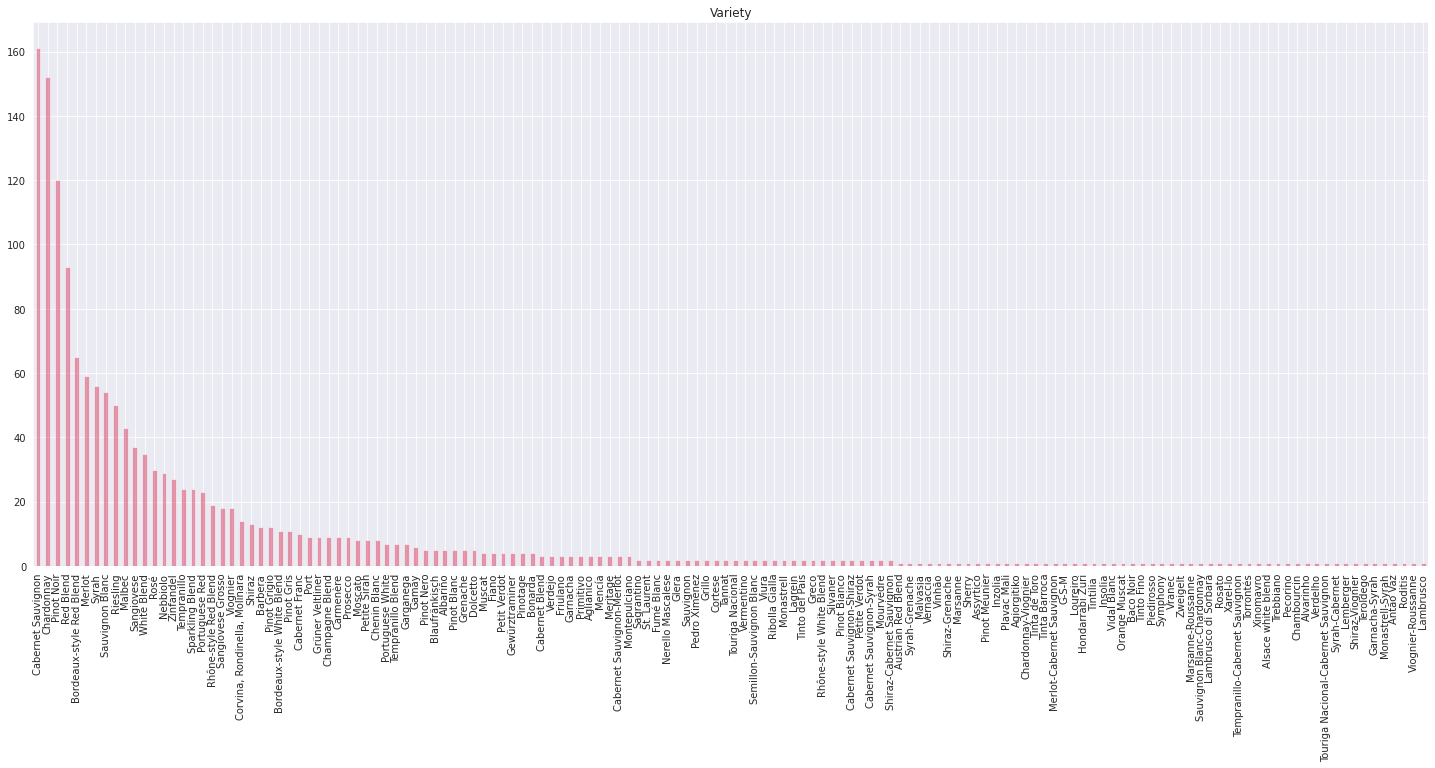

In [47]:
plt.figure(figsize=(25,10))
plot = serie.plot(kind='bar', title='Variety', color = '#d7385e', alpha = 0.5) 

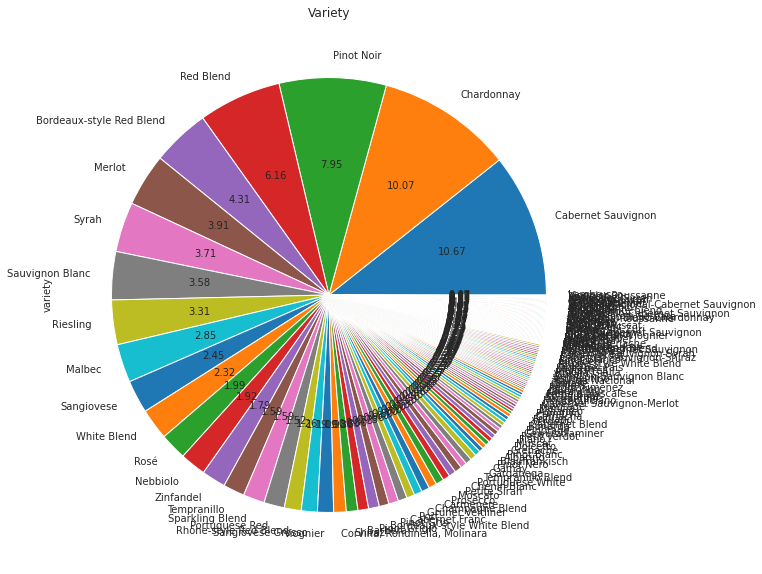

In [52]:
test['variety'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(10, 10), title='Variety')
plt.show()

Probablemente la variedad de Cabernet Sauvignon sea aquella que predomine en este tipo de vinos.

Ahora, sería obtener la relación en la tabla de contigencia entre la variedad y los países.

In [53]:
var_country = pd.crosstab(index = test["variety"], 
                           columns = test["country"])
data_table.DataTable(var_country, include_index = True, num_rows_per_page = 10, max_columns = 25)


Al igual de como habíamos visto con las tablas de frecuencia, también nos podría ser útil representar a las tablas de contingencia con porcentajes relativos; esto lo podríamos realizar utilizando el método apply.


In [54]:
per = pd.crosstab(test["variety"], test["country"]).apply(lambda r: r/r.sum(), axis = 1)
data_table.DataTable(per, include_index = True, num_rows_per_page = 10, max_columns = 25)



¿Qué otras variables o mezcla de variables sería interesante visualizar?




## Desafío Adicional (No calificado)

¿Será posible obtener de qué país y que tipo de variedad es aquella que presenta un precio (price) aceptable con respecto a la calidad de la clasificación del vino (points) y estos resultados plasmarlos en una tabla?

¿Habrá forma de obtener de que país se encuentran los mejores vinos considerando el mayor puntaje y la relación que existe con la variedad del mismo?

El análisis de discordancia (univariado) pudiera aplicarse a cualquier conjunto de datos presentados en esta notebook, ¿será posible realizarlo para los precios y/o puntos de los vinos?

El mismo análisis será bivariado de los vinos, ¿podrá ser aplicado al de empleados para visualizar cuales son las áreas de trabajo con menor salario?

In [55]:
test.describe()

points        price
count  1509.000000  1390.000000
mean     87.652750    32.705755
std       3.248754    33.200773
min      80.000000     5.000000
25%      85.000000    15.000000
50%      87.000000    24.000000
75%      90.000000    40.000000
max      96.000000   450.000000

In [0]:
pip install pdpipe

In [58]:
import pdpipe as pdp
ex1 = (test
          .query('points > 87') #datos mayores que el promedio
          .query('price >= 32 and price <=40') #datos entre el promedio y el 75% de ellos
           )
pipeline = pdp.ColDrop(['description','designation','province','region_1','region_2','winery']
                      ) #elimino las columnas que no me interesan
ex1 = pipeline(ex1)
ex1.sort_values(by=['points', 'price'])
ex1.reset_index(drop=True, inplace=True)
data_table.DataTable(ex1, include_index = True, num_rows_per_page = 10)

Esta tabla despliega los vinos que tienen los valores más altos que el promedio (87) y cuyo precio está entre 32 y 40, correspondientes al rango entre el 50 y 75% de los datos.

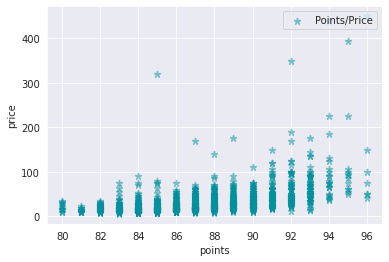

In [61]:
x = test['points'] 
y = test['price'] 

plt.scatter(x, y, c='#00909e', alpha=0.5, marker=(5, 2),
            label='Points/Price')
plt.xlabel("points")
plt.ylabel("price")
plt.legend(loc='upper right')
plt.show()

En la gráfica no se observa una correlación entre estas dos variables, podemos observar que hay productos de alta calidad con un precio mínimo.

In [63]:
ex2 = (test
          .query('points == 96') #datos mayores que el promedio
           )
pipeline = pdp.ColDrop(['description','designation','province','region_1','region_2','winery', 'price']
                      ) #elimino las columnas que no me interesan
ex2 = pipeline(ex2)
ex2.sort_values(by=['points'])
ex2.reset_index(drop=True, inplace=True)
data_table.DataTable(ex2, include_index = True, num_rows_per_page = 10)

Se observa que el país con los mejores vinos considerando el mayor puntaje y la relación que existe con la variedad del mismo es **Estados Unidos** con la variedad de vinos en Cabernet **Sauvignon**, **Syrah** y **Chardonnay**.

In [0]:
test = reviews.sample(frac=0.01, replace=True, random_state=1)

In [0]:
points = test['points']
price = test['price']

Length of the sample data: 1509, Test Statistic: 0.9853500723838806, p-value: 3.063883174947435e-11, Comments: 
Sample does not look Gaussian (reject H0)



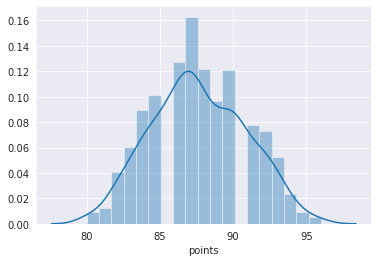

In [76]:
test_shapiro(points)
plt.show()

Since our Q-statistic is 0.0 and 0.0 < 0.29, 
we have evidence that our minimum point is NOT an outlier to the data.


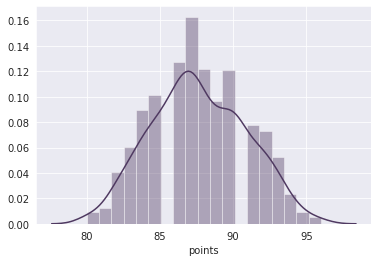

In [72]:
ax = sns.distplot(points, color = '#4f3961')
q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
q_stat = q_test(np.sort(points))
desicion(q_stat, q_ref)
plt.show()

De acuerdo con la prueba de Shapirom los datos 'points' no provienen de una distirbución gaussiana. Y no presenta valores discordantes.

Length of the sample data: 1509, Test Statistic: nan, p-value: 1.0, Comments: 
Sample looks Gaussian (fail to reject H0)



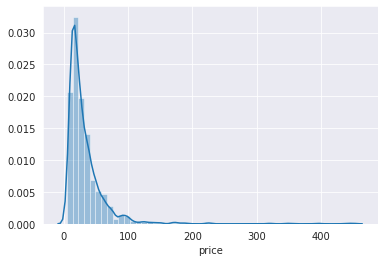

In [78]:
test_shapiro(price)
plt.show()

Since our Q-statistic is nan and nan < 0.29, 
we have evidence that our minimum point is NOT an outlier to the data.


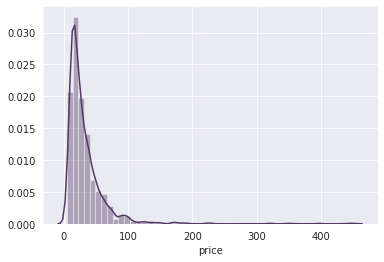

In [79]:
ax = sns.distplot(price, color = '#4f3961')
q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
q_stat = q_test(np.sort(price))
desicion(q_stat, q_ref)
plt.show()

Sin embargo para los datos 'price', la prueba de Shapiro nos indica que los datos de la muestra si provienen de una distirbución gaussiana. Y no presenta valores discordantes.

In [97]:
df = pd.read_csv('Employee.csv')
df.head()

satisfaction_level  last_evaluation  ...  Departments   salary
0                0.38             0.53  ...         sales     low
1                0.80             0.86  ...         sales  medium
2                0.11             0.88  ...         sales  medium
3                0.72             0.87  ...         sales     low
4                0.37             0.52  ...         sales     low

[5 rows x 10 columns]

In [98]:
ex1 = (df
       .query('salary == "low"') 
      )
pipeline = pdp.ColDrop(['satisfaction_level','last_evaluation','number_project','average_montly_hours',
                        'time_spend_company','Work_accident','left','promotion_last_5years']
                      ) 
ex1 = pipeline(ex1)
data_table.DataTable(ex1, include_index = True, num_rows_per_page = 10)

In [99]:
ex1['Departments '].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'product_mng',
       'management', 'marketing', 'IT', 'RandD'], dtype=object)

In [101]:
ex2 = (df
       .query('salary == "high"') 
      )
pipeline = pdp.ColDrop(['satisfaction_level','last_evaluation','number_project','average_montly_hours',
                        'time_spend_company','Work_accident','left','promotion_last_5years']
                      ) 
ex2 = pipeline(ex2)
data_table.DataTable(ex2, include_index = True, num_rows_per_page = 10)

In [102]:
ex2['Departments '].unique()

array(['product_mng', 'hr', 'technical', 'marketing', 'accounting',
       'support', 'sales', 'management', 'IT', 'RandD'], dtype=object)

Si comparamos los salarios altos con los bajos, observamos que comparten los mismo departamentos. Es decir, sin importar el departamento vas encontrar salarios altos y bajos (supongo que de la misma manera aplica para los medios). Sin embargo, existe una mayor cantidad de salarios bajos comparados con los altos.

In [125]:
print('Cantidad de departamentos con salarios bajos')
ex1.groupby("Departments ").count().sum()

Cantidad de departamentos con salarios bajos


salary    7316
dtype: int64

In [126]:
print('Cantidad de departamentos con salarios altos')
ex2.groupby("Departments ").count().sum()

Cantidad de departamentos con salarios altos


salary    1237
dtype: int64